In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
base = pd.read_csv("Multiple Cause of Death, 1999-2020 Age Gender Year Race COD Socioec.txt", sep='\t', skipfooter=0)

In [3]:
base.describe()

,Notes,Year,Year Code,socioec quintile
count,0.0,121440.000000,121440.000000,121440.000000
mean,NaN,2009.500000,2009.500000,3.000000
std,NaN,6.344315,6.344315,1.414219
min,NaN,1999.000000,1999.000000,1.000000
25%,NaN,2004.000000,2004.000000,2.000000
50%,NaN,2009.500000,2009.500000,3.000000
75%,NaN,2015.000000,2015.000000,4.000000
max,NaN,2020.000000,2020.000000,5.000000


In [4]:
base.head(3)

,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0,9033,Unreliable,1
1,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,1-4 years,4-Jan,0,38452,Unreliable,1
2,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,5-9 years,9-May,0,56191,Unreliable,1


In [35]:
base.head(3).to_csv('wonder_data_dict.csv', index=False)

## Replace "Suppressed" values in Crude Rate and Deaths

The dataset displays "Suppressed" if the value is between 0-9.  Replacing these with 5

A crude rate is defined as the total number of events, or count, divided by the mid-year total population of the selected geography and multiplied by a constant, which is a multiple of 10

In [5]:
bad_data_values = ['Suppressed', 'Unreliable', 'Not Applicable']

for bad_value in bad_data_values:
    print(f'Crude Rate "{bad_value}" Count: {len(base[base["Crude Rate"] == bad_value])}, Percent of Total: {round(len(base[base["Crude Rate"] == bad_value])/len(base) * 100, 2)}%')
    print(f'Deaths "{bad_value}" Count: {len(base[base["Deaths"] == bad_value])}, Percent of Total: {round(len(base[base["Deaths"] == bad_value])/len(base) * 100, 2)}%')


Crude Rate "Suppressed" Count: 20327, Percent of Total: 16.74%
Deaths "Suppressed" Count: 21266, Percent of Total: 17.51%
Crude Rate "Unreliable" Count: 66798, Percent of Total: 55.0%
Deaths "Unreliable" Count: 0, Percent of Total: 0.0%
Crude Rate "Not Applicable" Count: 26400, Percent of Total: 21.74%
Deaths "Not Applicable" Count: 0, Percent of Total: 0.0%


In [38]:
## Drop "Not Applicable" Rows:
base = base[base['Population'] != 'Not Applicable']
base["Population"] = pd.to_numeric(base["Population"], errors='coerce')

## Replace "Suppressed" with 5 deaths
base['Crude Rate'] = np.where(base["Crude Rate"] == 'Suppressed', 
                              (5 / base["Population"]) * 100000, 
                              base["Crude Rate"])
base.loc[base["Deaths"] == 'Suppressed', "Deaths"] = 5

print(len(base))

95040


In [39]:
bad_data_values = ['Suppressed', 'Unreliable', 'Not Applicable']

for bad_value in bad_data_values:
    print(f'Crude Rate "{bad_value}" Count: {len(base[base["Crude Rate"] == bad_value])}, Percent of Total: {round(len(base[base["Crude Rate"] == bad_value])/len(base) * 100, 2)}%')
    print(f'Deaths "{bad_value}" Count: {len(base[base["Deaths"] == bad_value])}, Percent of Total: {round(len(base[base["Deaths"] == bad_value])/len(base) * 100, 2)}%')


Crude Rate "Suppressed" Count: 0, Percent of Total: 0.0%
Deaths "Suppressed" Count: 0, Percent of Total: 0.0%
Crude Rate "Unreliable" Count: 0, Percent of Total: 0.0%
Deaths "Unreliable" Count: 0, Percent of Total: 0.0%
Crude Rate "Not Applicable" Count: 0, Percent of Total: 0.0%
Deaths "Not Applicable" Count: 0, Percent of Total: 0.0%


## Dtypes

In [40]:
base.dtypes

Notes                           float64
Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                            int64
Population                        int64
Crude Rate                      float64
socioec quintile                  int64
dtype: object

<Axes: xlabel='socioec quintile', ylabel='count'>

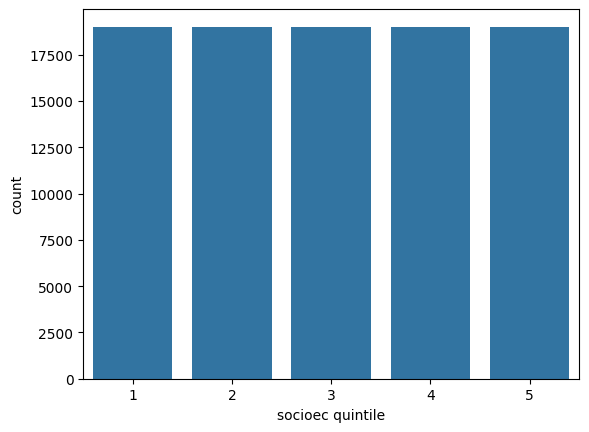

In [41]:
sns.countplot(data=base, x=base["socioec quintile"])

In [42]:
base["Crude Rate"] = pd.to_numeric(base["Crude Rate"], errors='coerce')
base["Deaths"] = pd.to_numeric(base["Deaths"], errors='coerce')

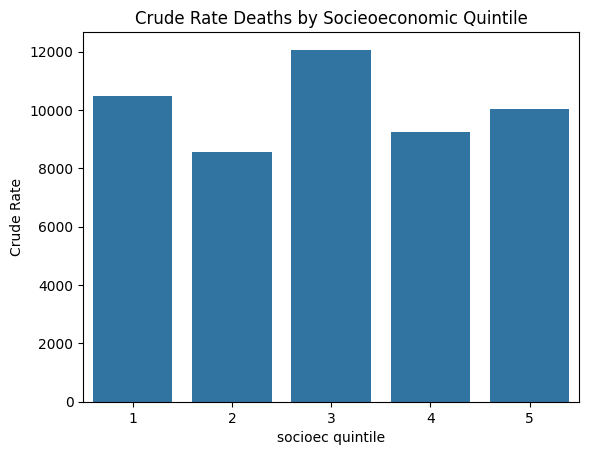

In [43]:
crude_rate_deaths_sum = base.groupby(["socioec quintile"])["Crude Rate"].sum().reset_index()
ax = sns.barplot(data= crude_rate_deaths_sum, 
            x="socioec quintile", y="Crude Rate").set(title="Crude Rate Deaths by Socieoeconomic Quintile")


<Axes: xlabel='socioec quintile', ylabel='Deaths'>

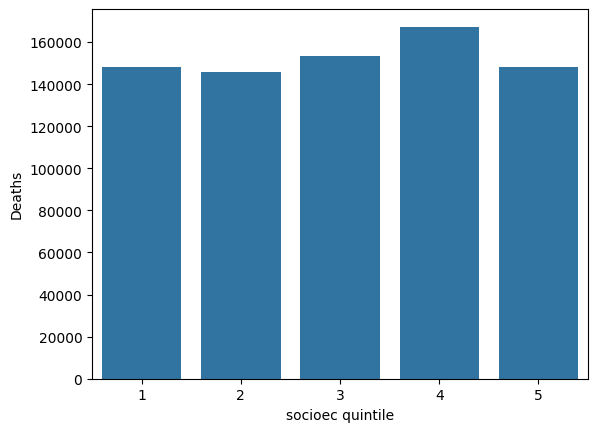

In [44]:
sns.barplot(data=base.groupby(["socioec quintile"])["Deaths"].sum().reset_index(), 
            x="socioec quintile", y="Deaths")

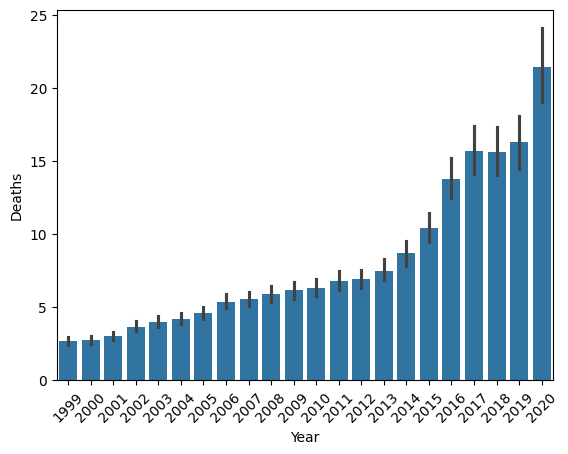

In [45]:
# Sum of Deaths over time
bar_deaths = sns.barplot(data=base, x='Year', y='Deaths')

for item in bar_deaths.get_xticklabels():
    item.set_rotation(45)

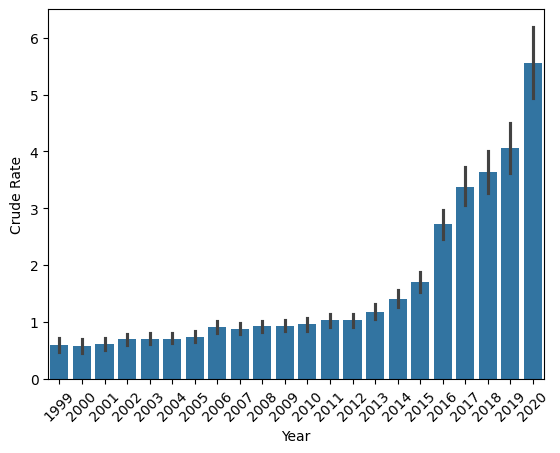

In [46]:
# Sum of Crude Rate over time

bar_cr = sns.barplot(data=base, x='Year', y='Crude Rate')

for item in bar_cr.get_xticklabels():
    item.set_rotation(45)

In [47]:
base.dtypes

Notes                           float64
Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                            int64
Population                        int64
Crude Rate                      float64
socioec quintile                  int64
dtype: object

# Duplicates

In [48]:
# There are no complete duplicates in the dataset, based on all columns
print(len(base))
print(len(base.drop_duplicates()))
base.drop_duplicates(inplace=False)

95040
95040


,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0,9033,NaN,1
1,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,1-4 years,4-Jan,0,38452,NaN,1
2,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,5-9 years,9-May,0,56191,NaN,1
3,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,10-14 years,14-Oct,0,56255,NaN,1
4,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,15-19 years,15-19,0,51137,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121430,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,60-64 years,60-64,18,1637972,NaN,5
121431,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,65-69 years,65-69,5,1328961,0.000376,5
121432,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,70-74 years,70-74,5,1068045,0.000468,5
121433,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,75-79 years,75-79,5,702229,0.000712,5


## Outliers

Typically, something like the below, but this dataset is relatively trustworthy

```python
# calculate IQR for column A
Q1 = base['Deaths'].quantile(0.25)
Q3 = base['Deaths'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_deaths = base[(base['Deaths'] < Q1 - threshold * IQR) | (base['Deaths'] > Q3 + threshold * IQR)]
```

Running the above returns many outliers: about 10% of the dataset

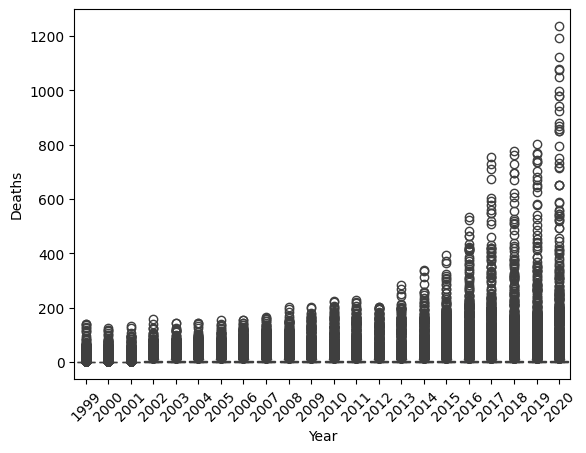

In [49]:
b_d_y = sns.boxplot(data=base, y="Deaths", x="Year")
for item in b_d_y.get_xticklabels():
    item.set_rotation(45)

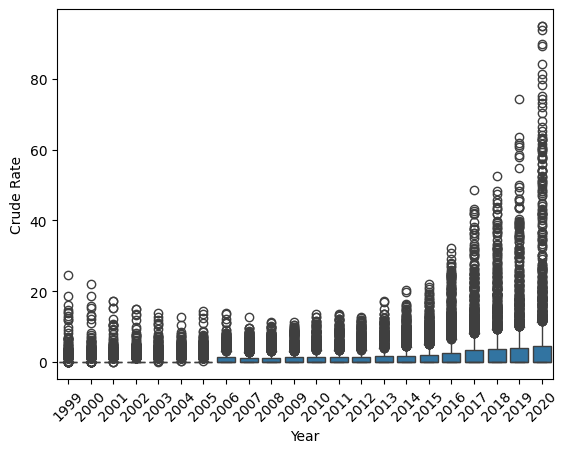

In [50]:
b_c_y = sns.boxplot(data=base, y="Crude Rate", x="Year")
for item in b_c_y.get_xticklabels():
    item.set_rotation(45)

<Axes: xlabel='socioec quintile', ylabel='Deaths'>

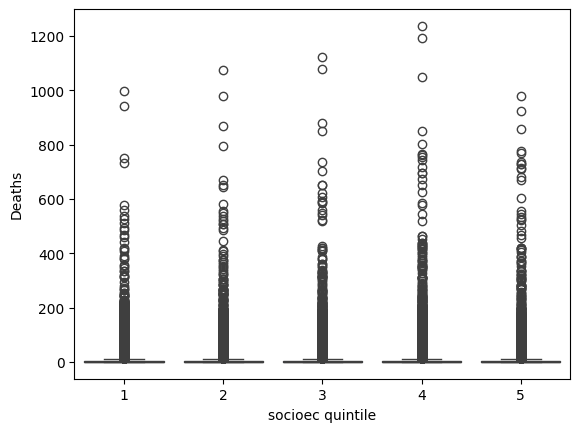

In [51]:
sns.boxplot(data=base, y="Deaths", x="socioec quintile")

<Axes: xlabel='socioec quintile', ylabel='Crude Rate'>

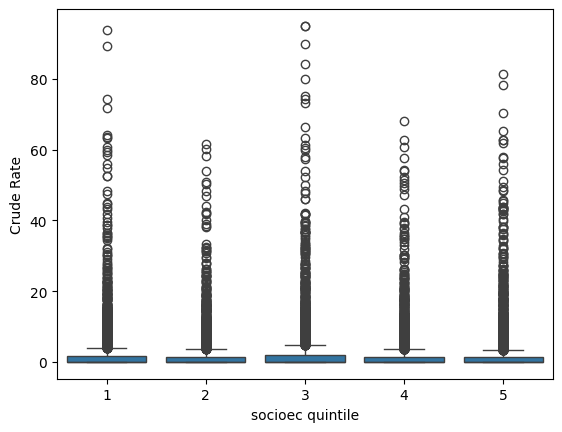

In [52]:
sns.boxplot(data=base, y="Crude Rate", x="socioec quintile")

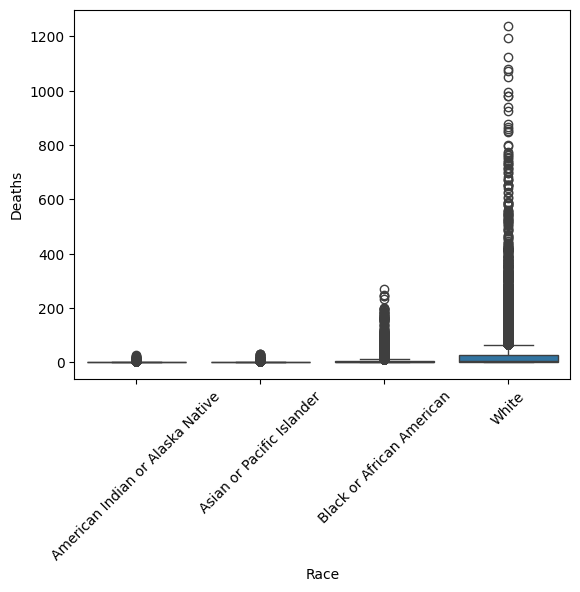

In [53]:
b_d_r = sns.boxplot(data=base, y="Deaths", x="Race")
for item in b_d_r.get_xticklabels():
    item.set_rotation(45)

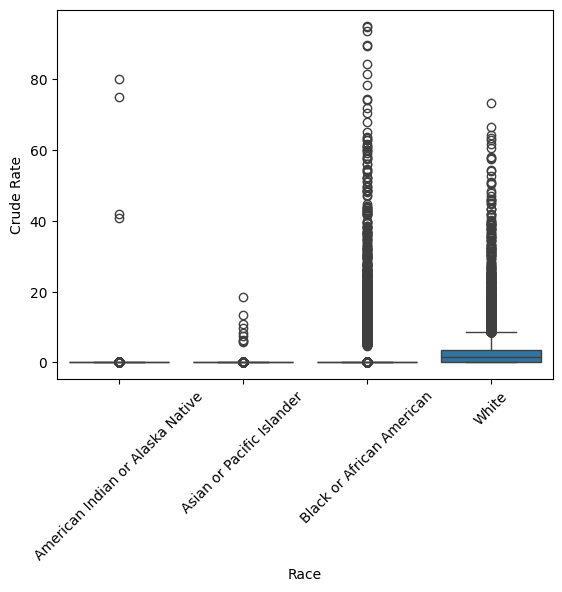

In [54]:
b_c_r = sns.boxplot(data=base, y="Crude Rate", x="Race")
for item in b_c_r.get_xticklabels():
    item.set_rotation(45)

In [22]:
# calculate IQR for column A
Q1 = base['Deaths'].quantile(0.25)
Q3 = base['Deaths'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_deaths = base[(base['Deaths'] < Q1 - threshold * IQR) | (base['Deaths'] > Q3 + threshold * IQR)]

In [23]:
print((len(outliers_deaths)/len(base))*100)

10.49347643097643


In [24]:
# calculate IQR for column A
Q1 = base['Crude Rate'].quantile(0.25)
Q3 = base['Crude Rate'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_crude_rate = base[(base['Crude Rate'] < Q1 - threshold * IQR) | (base['Crude Rate'] > Q3 + threshold * IQR)]

In [25]:
print((len(outliers_crude_rate)/len(base))*100)

3.785774410774411


## Missing Data

Fill in missing data with group averages to keep data continuous 

Crude Rate values Suppressed, Unreliable, and Not Applicable have been converted to nulls98

In [26]:
field = []
count_nulls = []
percent_nulls = []
for (value, column) in zip(base.isnull().sum(), base.isnull().columns):
    field.append(column)
    count_nulls.append(value)
    percent_nulls.append(value/len(base))

pd.DataFrame(zip(field, count_nulls, percent_nulls), columns = ["Field", "Count of Nulls", "Percent of Total"])

,Field,Count of Nulls,Percent of Total
0,Notes,95040,1.000000
1,Multiple Cause of death,0,0.000000
2,Multiple Cause of death Code,0,0.000000
3,Year,0,0.000000
4,Year Code,0,0.000000
5,Gender,0,0.000000
6,Gender Code,0,0.000000
7,Race,0,0.000000
8,Race Code,0,0.000000
9,Five-Year Age Groups,0,0.000000


In [31]:
cleaned = base[(base['Deaths'].isnull() == False) & (base['Crude Rate'].isnull() == False)]
cleaned.drop(columns=['Notes'], inplace=True)

/var/folders/yl/zy_202992md5vzz6c5thvp6w0000gr/T/ipykernel_2068/1510732456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned.drop(columns=['Notes'], inplace=True)


## Cleaned Data

In [32]:
len(cleaned)

28242

In [33]:
field = []
count_nulls = []
percent_nulls = []
for (value, column) in zip(cleaned.isnull().sum(), cleaned.isnull().columns):
    field.append(column)
    count_nulls.append(value)
    percent_nulls.append(value/len(base))

pd.DataFrame(zip(field, count_nulls, percent_nulls), columns = ["Field", "Count of Nulls", "Percent of Total"])

,Field,Count of Nulls,Percent of Total
0,Multiple Cause of death,0,0.0
1,Multiple Cause of death Code,0,0.0
2,Year,0,0.0
3,Year Code,0,0.0
4,Gender,0,0.0
5,Gender Code,0,0.0
6,Race,0,0.0
7,Race Code,0,0.0
8,Five-Year Age Groups,0,0.0
9,Five-Year Age Groups Code,0,0.0
